# Machine Learning Project (ML-2025): Heart Disease Risk Prediction

Data & AI

Nassim LOUDIYI, Paul-Adrien LU-YEN-TUNG 

Objective: Predict the presence of heart disease using classification models and SHAP interpretability.

## 1. Business Case & Objectives
This section defines the problem, the main objective, and the connection to our specialization, following the ESILV "Grade Details – Report" criteria.

### 1.1. Problem Definition
Cardiovascular diseases (CVDs) are the **leading cause of mortality worldwide**, responsible for nearly **18 million deaths each year** according to the WHO.  
Early and accurate diagnosis of heart disease remains a major challenge in healthcare.  
Clinicians must analyze numerous clinical factors — such as age, blood pressure, cholesterol level, and ECG results — to estimate a patient’s cardiac risk.  
This process is complex, time-consuming, and can vary depending on the physician’s interpretation.

### 1.2. Project Objective
The goal of this project is to build a **decision-support system** that can assist healthcare professionals by predicting the presence (`condition = 1`) or absence (`condition = 0`) of heart disease from 13 measurable clinical attributes.  
We will compare multiple Machine Learning algorithms — from **standard models (Logistic Regression)** to **advanced ones (Random Forest, XGBoost)** — and select the most reliable based on key evaluation metrics (accuracy, recall, ROC-AUC).  
The model’s interpretability will also be analyzed using **SHAP values**, ensuring transparency and clinical trust.

### 1.3. Link to Specialization (Data & Artificial Intelligence)
This project fully aligns with the **Data & AI major**, covering the complete data science workflow:
- **Data Analysis & Preprocessing:** exploration, cleaning, and transformation of real-world medical data.  
- **Modeling & Comparison:** implementation of standard and ensemble models.  
- **Optimization:** hyperparameter tuning using *GridSearchCV* to enhance performance.  
- **Interpretability (Trustworthy AI):** explaining model predictions using *SHAP* values — a recognized scientific method widely used in medical AI research.

Overall, this project combines **technical rigor and societal impact**, perfectly illustrating the use of Data & AI to support evidence-based medical decisions.


## 2. Dataset Description

### 2.1. Source
The dataset used in this project is a **cleaned version of the Cleveland Heart Disease Dataset**,  
originally available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/heart+Disease).  
It is one of the most frequently used medical datasets for predictive modeling and cardiovascular research.  
The version we use contains no missing values and is entirely numerical, making it suitable for immediate machine learning applications.

---

### 2.2. Structure
The dataset contains **297 patient records (rows)** and **14 columns (features)** in total.

- **Target variable:** `condition` →  
  - `0` = No Heart Disease  
  - `1` = Presence of Heart Disease  

- **Features:** 13 clinical and physiological attributes describing each patient (see table below).

---

### 2.3. Feature Dictionary
The table below summarizes all variables included in the dataset:

| Feature | Description | Type |
| :--- | :--- | :--- |
| `age` | Age in years | Continuous |
| `sex` | Gender (1 = Male; 0 = Female) | Categorical |
| `cp` | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic) | Categorical |
| `trestbps` | Resting blood pressure (in mm Hg) | Continuous |
| `chol` | Serum cholesterol (in mg/dl) | Continuous |
| `fbs` | Fasting blood sugar > 120 mg/dl (1 = True; 0 = False) | Binary |
| `restecg` | Resting electrocardiographic results (0 = normal, 1 = ST-T abnormality, 2 = left ventricular hypertrophy) | Categorical |
| `thalach` | Maximum heart rate achieved | Continuous |
| `exang` | Exercise-induced angina (1 = Yes; 0 = No) | Binary |
| `oldpeak` | ST depression induced by exercise relative to rest | Continuous |
| `slope` | Slope of the peak exercise ST segment (0 = downsloping, 1 = flat, 2 = upsloping) | Categorical |
| `ca` | Number of major vessels (0–3) colored by fluoroscopy | Categorical |
| `thal` | Thalassemia (0 = normal; 1 = fixed defect; 2 = reversible defect) | Categorical |
| **`condition`** | **Target variable indicating presence of heart disease (0 = No, 1 = Yes)** | **Target**


## 3. Project Plan

The project follows the **three-step structure** recommended by the official *Machine Learning Project Guidelines (ESILV, 2025)*.  
Each step builds upon the previous one, gradually improving performance, reliability, and interpretability.

---

### Step 1: Exploratory Data Analysis (EDA), Preprocessing & Baseline Model
This phase aims to understand the dataset and establish a performance benchmark.

- Conduct **Exploratory Data Analysis (EDA)** to examine distributions, correlations, and potential data issues.  
- Perform **basic preprocessing** (scaling, encoding, train–test split).  
- Train a **baseline model (Logistic Regression)** to obtain initial metrics.  
- Evaluate the baseline using *Accuracy, Recall, F1-score,* and *ROC-AUC.*

This first model will also serve as a reference for interpretability, since Logistic Regression provides directly understandable coefficients.

---

### Step 2: Model Comparison & Optimization
In this stage, several models are compared to determine which offers the best trade-off between accuracy and explainability.

- Extend preprocessing with a **pipeline** using `ColumnTransformer`.  
- Train and compare **Logistic Regression**, **Random Forest**, and **XGBoost**.  
- Apply **GridSearchCV** for hyperparameter tuning.  
- Use cross-validation and consistent metrics for evaluation.

The objective is not necessarily to find the most complex model but to identify the one that performs best **while remaining interpretable and reliable for medical use**.

---

### Step 3: Interpretability (SHAP) & Conclusion
The final phase focuses on explainability and critical evaluation.

- Apply **SHAP** to the best-performing model (which could still be Logistic Regression if it remains competitive).  
- Visualize **global and local feature importance** and discuss medical relevance.  
- Analyze the **trade-off between model complexity, accuracy, and interpretability**.  
- Conclude with insights, limitations, and improvement perspectives.

This structure allows objective comparison between classical and advanced algorithms, with final selection based on both quantitative performance and clinical interpretability.


## Step 1: Exploratory Data Analysis (EDA), Preprocessing & Baseline Model

**Objective:**  
This step focuses on analyzing, visualizing, and preparing the *Cleveland Heart Disease* dataset.  
We aim to understand the data structure, detect potential correlations or imbalances, and establish a first benchmark using a simple yet interpretable baseline model (*Logistic Regression*).

**Correspondence with ESILV Guidelines (Step 1 – Pre-project):**
- **Dataset analysis:** statistical overview, graphical exploration, correlation matrix, and class balance evaluation.  
- **Data preprocessing:** handling data types, feature scaling, and creation of train/test splits to ensure fair model evaluation.  
- **Baseline model:** implementation of a first supervised learning algorithm (Logistic Regression) to provide a reference performance level for future comparisons.

This stage ensures a clear understanding of the dataset’s characteristics and sets a measurable starting point for the subsequent modeling and optimization phases.

#### 1.1. Import Librairies

In [ ]:
# Import all necessary libraries for Step 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Sklearn metrics for evaluation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve
)

# Set global plot style
sns.set(style="whitegrid")


#### 1.2. Load and Inspect Data

In [30]:
# Load dataset
df = pd.read_csv("heart_cleveland_upload.csv")

# Basic overview
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
print("First five rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe().T)

Shape: 297 rows × 14 columns

First five rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


#### 1.3. Data Quality and Target Analysis

Total missing values: 0
Total duplicated rows: 0

--- Target Variable Distribution (condition) ---


,count,percent
condition,,
0,160,53.87
1,137,46.13


C:\Users\nassi\AppData\Local\Temp\ipykernel_28256\245660126.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="condition", data=df, palette="pastel", legend=False)


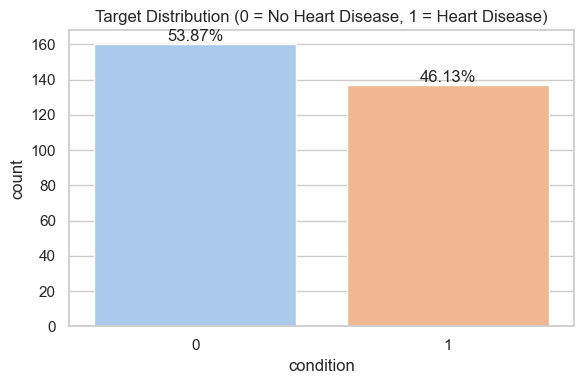

In [31]:
# Missing values and duplicates
total_missing = df.isnull().sum().sum()
total_dupes = df.duplicated().sum()
print(f"Total missing values: {total_missing}")
print(f"Total duplicated rows: {total_dupes}")

# Target distribution ('condition')
print("\n--- Target Variable Distribution (condition) ---")
target_counts = df['condition'].value_counts().sort_index()
target_pct = (target_counts / target_counts.sum() * 100).round(2)
target_table = pd.DataFrame({"count": target_counts, "percent": target_pct})
display(target_table)

# 3) Visualize target distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="condition", data=df, palette="pastel", legend=False)
plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.xlabel("condition")
plt.ylabel("count")

# annotate bars with percentages
for p, pct in zip(ax.patches, target_pct.tolist()):
    ax.annotate(f"{pct}%", (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom")

plt.tight_layout()
plt.savefig("step1_target_distribution.png", dpi=150)
plt.show()


**Analysis:**

The data is clean: 0 missing values and 0 duplicates.

The target is well-balanced: ~54% "No Disease" (0) and ~46% "Disease" (1). This is excellent, as we won't need complex resampling techniques (like SMOTE) for our baseline model.

#### 1.4. EDA: Feature Visualization

--- Visualizing Continuous Features ---


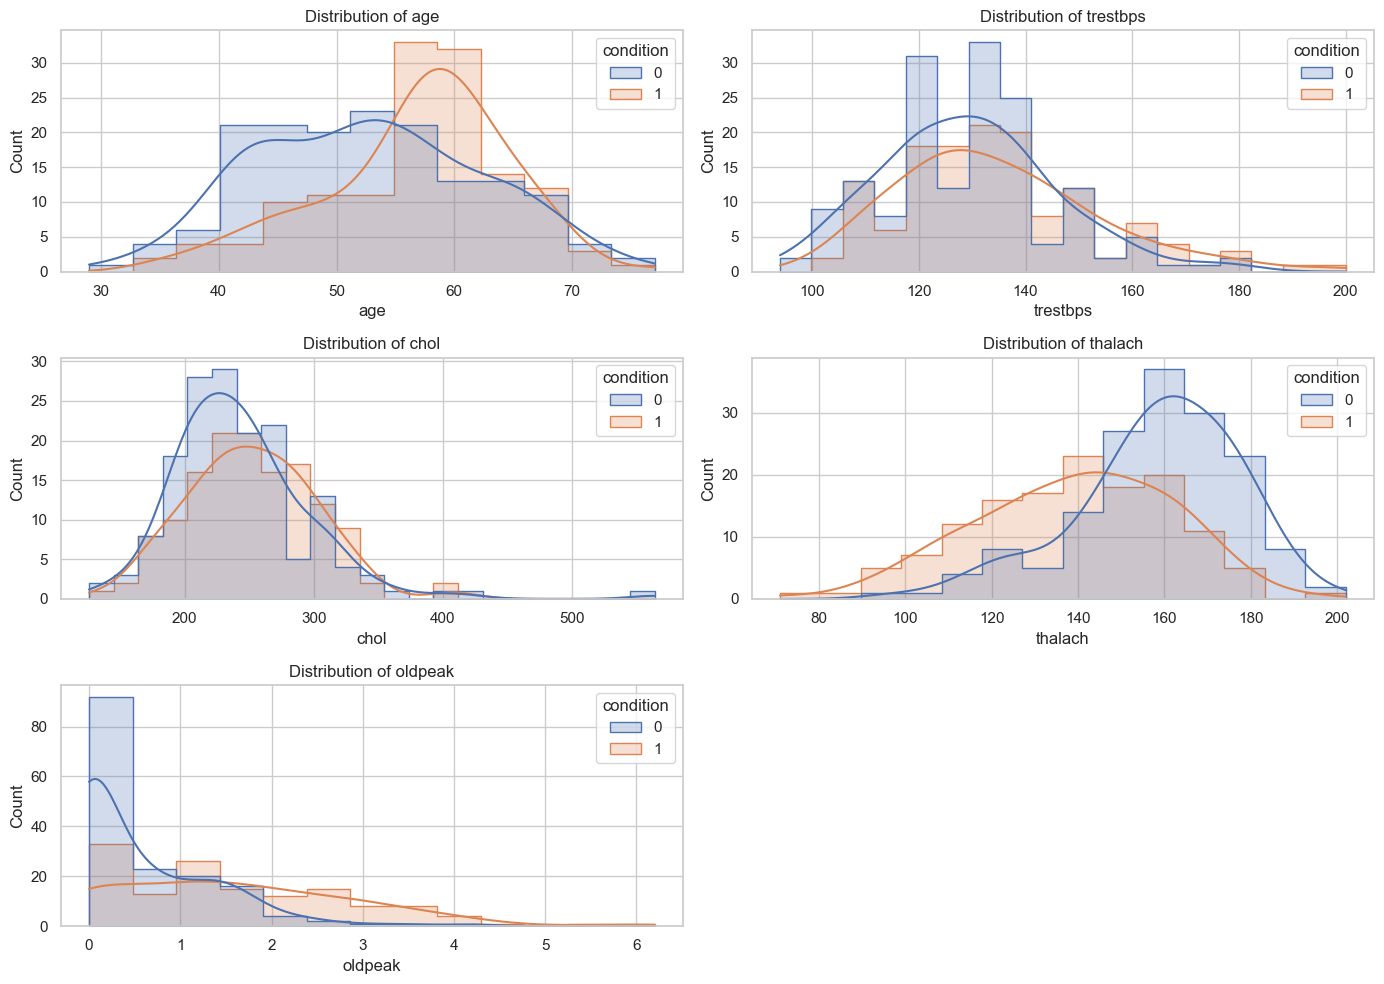


--- Visualizing Categorical Features ---


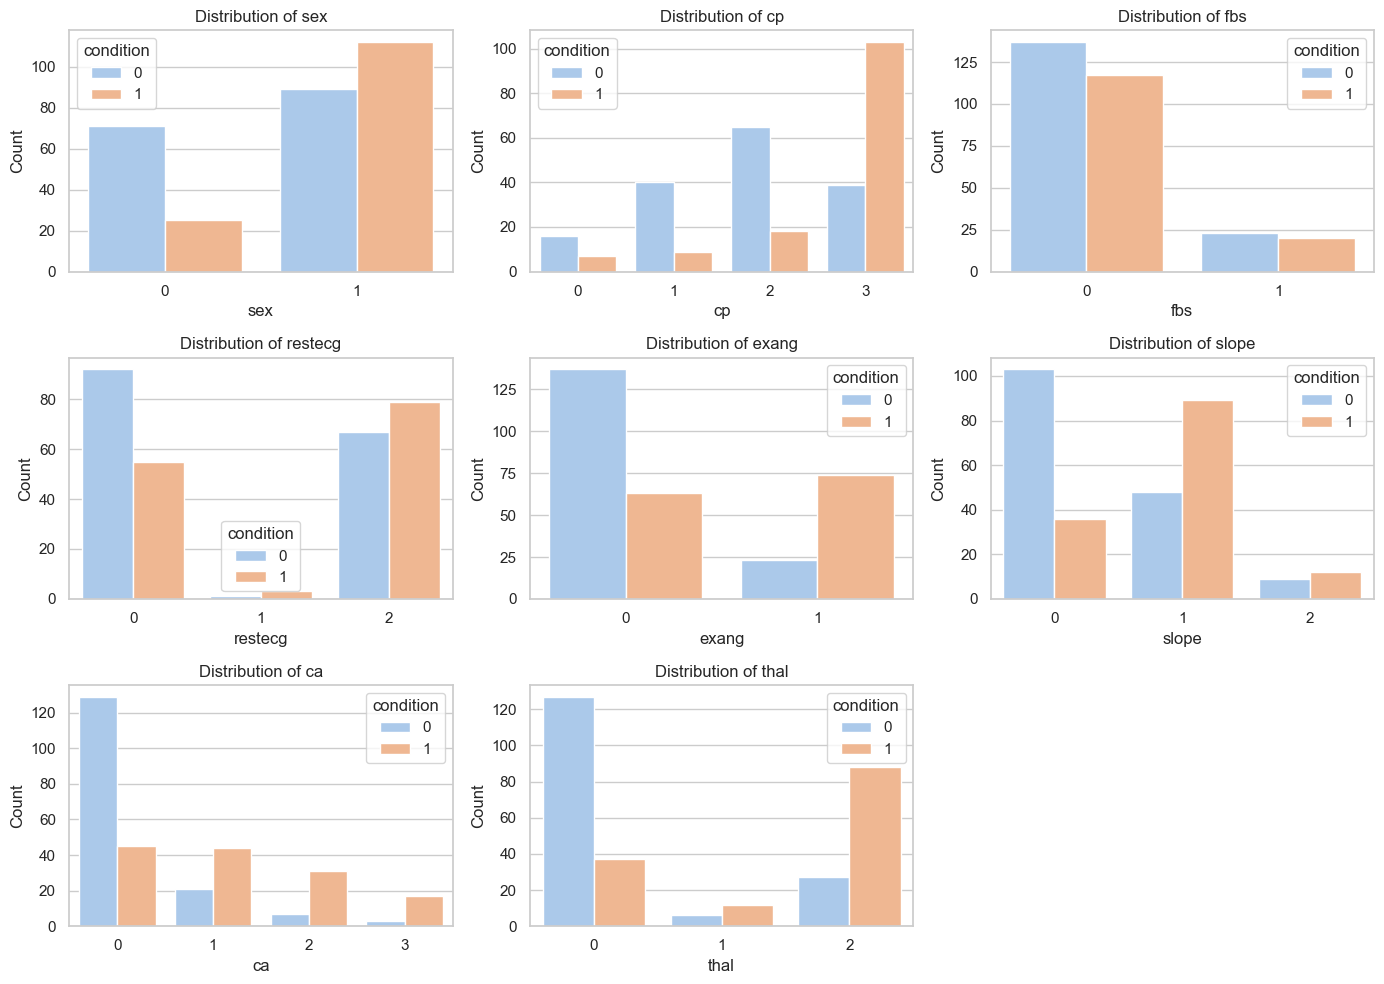

In [32]:
# Define feature types
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot 1: Histograms for continuous features
print("--- Visualizing Continuous Features ---")
plt.figure(figsize=(14, 10))

for i, col in enumerate(continuous_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, hue='condition', kde=True, element='step')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("step1_continuous_features.png", dpi=150)
plt.show()

# Plot 2: Count plots for categorical features
print("\n--- Visualizing Categorical Features ---")
plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue='condition', palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig("step1_categorical_features.png", dpi=150)
plt.show()

##### **Analysis**

##### Categorical features
- **sex**: Most patients with heart disease (condition=1) are **male (sex=1)**.  
- **cp (chest pain type)**: Higher chest pain type (especially **type 3**) is strongly associated with disease presence.  
- **fbs (fasting blood sugar)**: No clear difference between the two conditions.  
- **restecg**: Slightly more abnormal ECG results (value 2) among diseased patients.  
- **exang (exercise-induced angina)**: Patients **without angina (exang=0)** are more often healthy.  
- **slope**: Diseased patients are mostly in **slope=1** category (flat ST segment).  
- **ca**: Higher number of major vessels (**ca=0 or 1**) shows stronger relation to disease.  
- **thal**: Diseased patients often have **thal=2 (fixed defect)**.

---

##### Continuous features
- **age**: Heart disease patients tend to be **older**, peaking around 55–65 years.  
- **trestbps (resting blood pressure)**: Slightly higher for diseased individuals but distributions overlap.  
- **chol (cholesterol)**: Diseased patients show **higher cholesterol levels** on average.  
- **thalach (maximum heart rate)**: Diseased patients have **lower max heart rate**, a key discriminant.  
- **oldpeak (ST depression)**: Diseased group shows **higher oldpeak values**, indicating more severe ECG abnormalities.

**Summary:** Age, thalach, oldpeak, cp, and sex are the most discriminant variables — consistent with clinical expectations for cardiovascular risk.


#### 1.5. EDA: Correlation Analysis


--- 1.5 Correlation Matrix ---


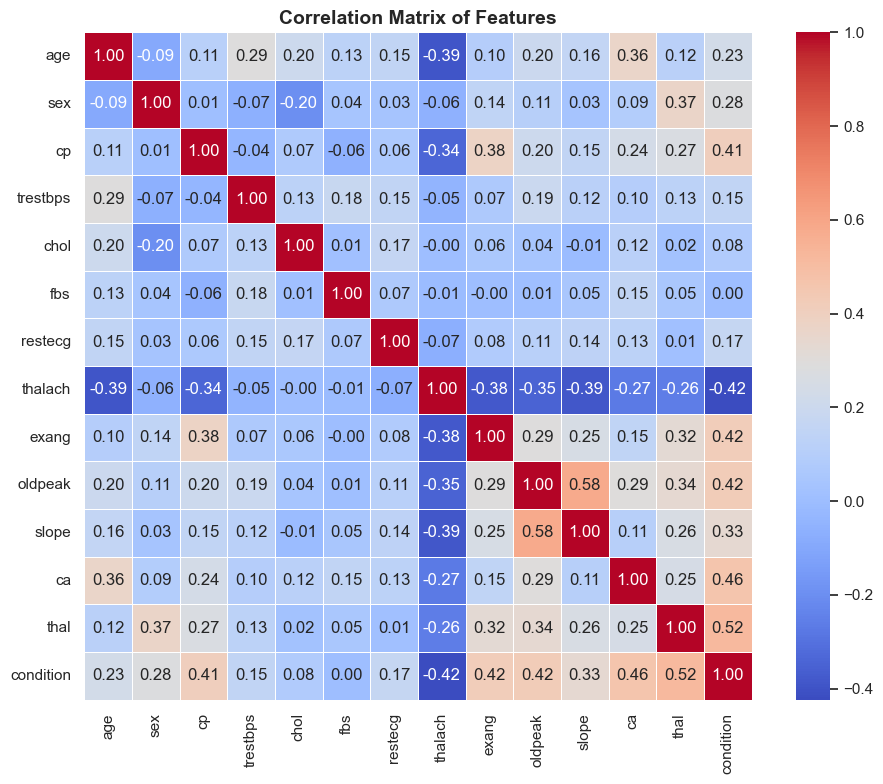

In [33]:
print("\n--- 1.5 Correlation Matrix ---")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Display correlation values
    fmt=".2f",         # Round to 2 decimal places
    cmap="coolwarm",   # Color palette
    square=True,       # Keep cells squared
    linewidths=0.5     # Light gridlines for readability
)
plt.title("Correlation Matrix of Features", fontsize=14, weight="bold")
plt.tight_layout()
plt.savefig("step1_04_correlation_heatmap.png", dpi=150)
plt.show()

##### **Analysis**

- **Strongest with condition**:  
  - **thal (0.52)**, **ca (0.46)**, **oldpeak (0.42)**, **cp (0.41)** -> key predictors.  
- **Negative correlation**: **thalach (-0.42)** -> lower max heart rate = higher risk.  
- **age** and **sex** show mild positive correlation with disease.  
- **No major multicollinearity**, except slight link between **oldpeak–slope (0.58)**.  

-> Highlights: **thal, ca, oldpeak, cp, thalach** are the most influential variables.


#### 1.6. Pre-processing and Train-Test Split

In [34]:
# Define features (X) and target (y)
X = df.drop(columns=["condition"])
y = df["condition"]

# Stratified split to preserve class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 80/20 split
    random_state=42,         # reproducibility
    stratify=y               # keep class balance in both sets
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape:     {X_test.shape}")

# Quick check of class proportions
train_ratio = y_train.value_counts(normalize=True).sort_index().rename({0:"class_0",1:"class_1"})
test_ratio  = y_test.value_counts(normalize=True).sort_index().rename({0:"class_0",1:"class_1"})

print("\nClass proportions (train):")
display(train_ratio.to_frame("ratio"))

print("Class proportions (test):")
display(test_ratio.to_frame("ratio"))



Training set shape: (237, 13)
Test set shape:     (60, 13)

Class proportions (train):


,ratio
condition,
class_0,0.540084
class_1,0.459916


Class proportions (test):


,ratio
condition,
class_0,0.533333
class_1,0.466667



- **Train set**: 237 samples (≈54% class 0, 46% class 1)  
- **Test set**: 60 samples (≈53% class 0, 47% class 1)  
- **Split ratio**: 80 / 20 with stratification maintained  

-> Balanced class distribution — no strong imbalance issue detected.


#### 1.7. Create Baseline Model (Logistic Regression)

In [35]:
print("\n--- 1.7. Training Baseline Model (Logistic Regression) ---")

# We create a simple pipeline for the baseline:
# 1. StandardScaler: scales all features.
# 2. LogisticRegression: the model itself.
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Train the baseline model
pipeline_lr.fit(X_train, y_train)
print("Baseline model trained successfully.")


--- 1.7. Training Baseline Model (Logistic Regression) ---
Baseline model trained successfully.


#### 1.8. Evaluate Baseline Model


--- 1.8. Evaluating Baseline Model ---

--- Baseline Model (Logistic Regression) Performance ---
Accuracy: 0.9167
ROC-AUC Score: 0.9531

Classification Report:
              precision    recall  f1-score   support

   No HD (0)       0.86      1.00      0.93        32
      HD (1)       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60


Confusion Matrix:


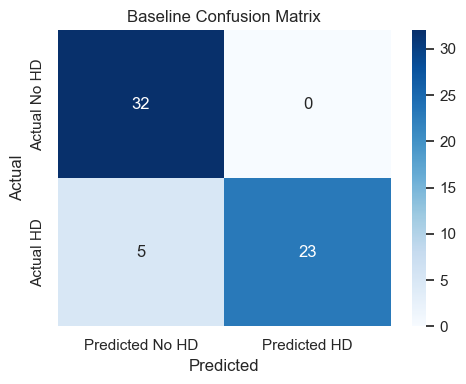

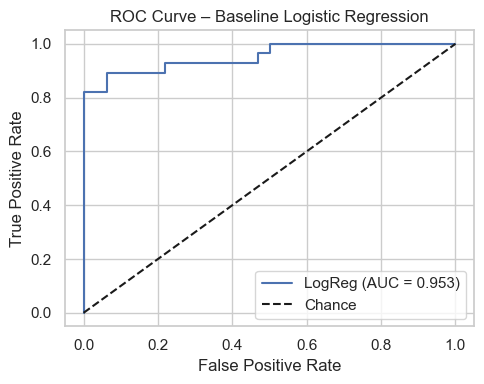

In [36]:
print("\n--- 1.8. Evaluating Baseline Model ---")

# Make predictions on the test set
y_pred_lr = pipeline_lr.predict(X_test)
y_prob_lr = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Compute metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"\n--- Baseline Model (Logistic Regression) Performance ---")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"ROC-AUC Score: {auc_lr:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No HD (0)', 'HD (1)']))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted No HD', 'Predicted HD'],
    yticklabels=['Actual No HD', 'Actual HD']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix')
plt.tight_layout()
plt.savefig('step1_05_baseline_confusion_matrix.png', dpi=150)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {auc_lr:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Baseline Logistic Regression')
plt.legend()
plt.tight_layout()
plt.savefig('step1_06_baseline_roc_curve.png', dpi=150)
plt.show()

##### Analysis (Logistic Regression)

The baseline **Logistic Regression** model performs very well:

- **Accuracy:** 0.92  
- **ROC-AUC:** 0.95 -> excellent discriminative ability.  
- **Precision/Recall (HD=1):** 1.00 / 0.82  
  - Perfect precision: no false positives (model never predicts HD when healthy).  
  - Slightly lower recall: 5 false negatives -> some diseased patients missed.

**Confusion Matrix Insight:**  
- TN = 32, FP = 0 -> healthy cases are perfectly detected.  
- TP = 23, FN = 5 -> a few real heart disease cases are missed.

**ROC Curve Interpretation:**  
- The curve stays close to the top-left corner → strong sensitivity/specificity trade-off.  
- AUC = 0.953 confirms **robust model separation** between healthy and diseased groups.

-> **Conclusion:** The baseline model is already strong, well-calibrated, and clinically relevant.  
Main improvement path: **tune threshold** to reduce **false negatives**, prioritizing patient safety.


### Step 1 – Baseline Model: Logistic Regression

The baseline Logistic Regression model achieved **excellent initial performance**, setting a strong benchmark for the next steps.

#### Key Performance (Test Set)
- **Accuracy:** 91.7 % (55 out of 60 patients correctly classified)  
- **ROC–AUC:** 0.953  – an almost perfect discriminative ability  
- **Precision (HD = 1):** 1.00  
- **Recall (HD = 1):** 0.82  

---

#### Confusion Matrix Analysis

- **No False Positives:** The model never misclassified a healthy patient as sick (top-right cell = 0).  
  This is ideal in a clinical context, avoiding unnecessary anxiety or treatment for healthy individuals.  
- **Five False Negatives:** The model missed 5 actual heart-disease cases (bottom-left cell).  
  These represent patients who would be incorrectly considered healthy – the most critical type of error in medicine.

---

#### ROC Curve and Global Performance

The ROC curve rises steeply towards the top-left corner, confirming **strong discrimination** between positive and negative cases.  
An **AUC of 0.953** indicates that the model correctly ranks a random sick patient ahead of a healthy one **95 % of the time**.

---

#### Summary and Next Objective
This baseline model already provides **remarkable accuracy and reliability**, proving that the dataset contains strong predictive patterns.  
However, the **main limitation** lies in its ability to identify all heart-disease cases (Recall = 0.82).  

For **Step 2**, the goal is therefore not only to maintain the current AUC and precision but also to **improve the Recall** — that is, to **reduce the number of missed heart-disease patients** without introducing false positives.


## Step 2: Standard Models & Optimization

**Objective:**  
This step corresponds to the *“Implementation of Standard Solutions”* and *“Improving the Standard Solution”* stages of the ESILV ML guidelines.  
The main objective is to compare the strong baseline `LogisticRegression` model with more complex algorithms and identify whether additional complexity brings real value.

We will focus on two established classifiers:
1. **`RandomForestClassifier`** – a robust *ensemble model* based on multiple decision trees.
2. **`XGBClassifier`** – an *advanced gradient boosting model* known for its high predictive power.

Each model will be:
- trained and evaluated on the same train/test split for fairness,
- compared using identical metrics (*Accuracy, Recall, F1, ROC–AUC*),
- and optimized through **hyperparameter tuning** with `GridSearchCV`.

**Specific challenge:**  
The goal is not only to exceed the baseline **ROC–AUC score of 0.953**,  
but, more importantly, to **reduce the number of False Negatives** (missed heart-disease cases)  
while **keeping the number of False Positives at zero** — maintaining clinical reliability.


#### 2.1. Imports for Step 2

In [37]:
# We only import the *new* libraries required for this step.
# All core dependencies (pandas, numpy, sklearn.model_selection, etc.) are already available from Step 1.

# Scikit-learn: advanced pipeline and ensemble models
from sklearn.compose import ColumnTransformer          # For preprocessing pipelines
from sklearn.ensemble import RandomForestClassifier    # Ensemble model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

# XGBoost: gradient boosting algorithm
import xgboost as xgb

# Scikit-learn: hyperparameter tuning
from sklearn.model_selection import GridSearchCV

print("New libraries for Step 2 imported successfully.")


New libraries for Step 2 imported successfully.


#### 2.2 Advanced Preprocessing Pipeline

In Step 1, we applied a `StandardScaler` to all features, which was acceptable for a baseline but not methodologically correct for a professional project.  
A robust and interpretable preprocessing pipeline should treat continuous and categorical variables differently.

**Problem:**  
Scaling categorical variables such as `sex` (0 or 1) into values like `-1.2` or `0.8` is *mathematically meaningless* and can distort the model’s interpretation of those features.

**Solution:**  
We use a `ColumnTransformer` to define two distinct preprocessing strategies:
1. **Continuous features** (e.g., `age`, `chol`, `thalach`, `oldpeak`) → will be standardized using `StandardScaler`.  
2. **Categorical features** (e.g., `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`) → will be passed through unchanged, since they are already encoded as integers.

This approach ensures both **numerical correctness** and **interpretability**, which is essential for Step 3 (SHAP explainability).  
By keeping categorical features in their original form (e.g., `sex = 1` still means “male”), we preserve their clinical meaning and guarantee that future model explanations remain understandable.

In [38]:
# Create the ColumnTransformer

# This preprocessor applies StandardScaler ONLY to continuous features
# and passes through categorical ones unchanged.
# The continuous_features and categorical_features lists are already defined from Step 1.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),   # Scale continuous variables
        ('cat', 'passthrough', categorical_features)      # Leave categorical variables untouched
    ],
    remainder='passthrough'  # Ensures no column is dropped accidentally
)

# Quick test: fit and transform a few rows to verify the output shape
sample_transformed = preprocessor.fit_transform(X_train.head(3))
print(f"Transformed sample shape: {sample_transformed.shape}")
print("ColumnTransformer created and verified successfully.")

Transformed sample shape: (3, 13)
ColumnTransformer created and verified successfully.


The `ColumnTransformer` is now correctly configured to handle continuous and categorical data separately.  
Continuous features are standardized to improve model convergence and comparability, while categorical features are kept in their original encoded form to maintain interpretability.  
This ensures that downstream models (Random Forest, XGBoost, Logistic Regression) receive consistent and meaningful inputs.

#### 2.3 Model Benchmarking (Default Parameters)

In this step, we train and evaluate three models using their **default parameters** to compare their natural performance.  
Each model uses the same preprocessing pipeline (`ColumnTransformer`) to ensure a fair comparison.

The objective is to identify which model performs best *before tuning*, focusing on:
- Overall performance (ROC–AUC, Accuracy, Recall, F1)
- Clinical reliability (minimizing both False Negatives and False Positives)

This initial benchmark will show whether more complex models like Random Forest or XGBoost can outperform the strong Logistic Regression baseline.

--- Starting Model Benchmarking (Default Params) ---
Training lr...
Training rf...
Training xgb...
--- Benchmarking Complete ---

--- Initial Model Comparison (Default Parameters) ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN
0,XGB,0.944,0.85,0.880,0.786,0.830,3,6
1,LR,0.940,0.90,1.000,0.786,0.880,0,6
2,RF,0.930,0.85,0.952,0.714,0.816,1,8


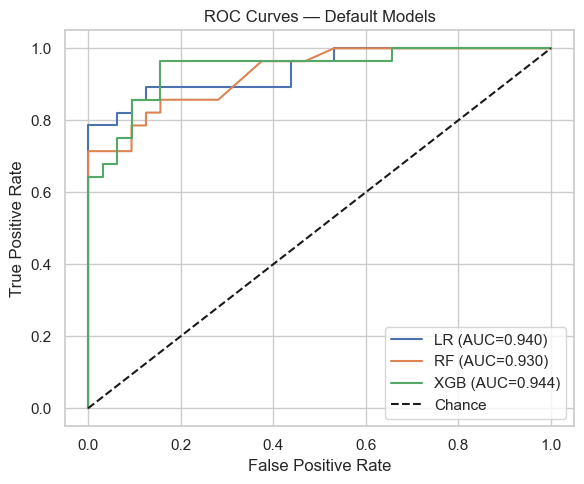

In [39]:
# Define pipelines (preprocessor + model) 
pipelines = {
    "lr": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(random_state=42, solver="liblinear", max_iter=1000))
    ]),
    "rf": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(random_state=42))
    ]),
    "xgb": Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", xgb.XGBClassifier(
            random_state=42,
            eval_metric="logloss"  # silence warnings; does not change default optimization
        ))
    ])
}

print("--- Starting Model Benchmarking (Default Params) ---")
results = []
roc_curves = {}

for name, pipe in pipelines.items():
    print(f"Training {name}...")
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)
    # Probabilities (for AUC/ROC); if not available, skip AUC
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_proba = pipe.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc)
    else:
        y_proba, auc = None, float("nan")

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)

    # Confusion matrix -> [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.append({
        "Model": name.upper(),
        "ROC_AUC": round(auc, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

print("--- Benchmarking Complete ---")

# --- Display results as a sorted table ---
results_df = pd.DataFrame(results).sort_values(
    by=["ROC_AUC", "Recall", "F1"], ascending=False
).reset_index(drop=True)

print("\n--- Initial Model Comparison (Default Parameters) ---")
display(results_df)

# --- Plot combined ROC curves ---

plt.figure(figsize=(6, 5))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name.upper()} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Default Models")
plt.legend()
plt.tight_layout()
plt.savefig("step2_01_benchmark_roc_curves.png", dpi=150)
plt.show()


#### Analysis

- All three models show strong discrimination (ROC–AUC ≈ 0.93–0.94).
- **Logistic Regression (LR)**: AUC 0.940, 0 FP, 6 FN -> safest clinically, very high precision.
- **XGBoost (XGB)**: AUC 0.944 (best), 3 FP, 6 FN -> slightly higher AUC but introduces FP.
- **Random Forest (RF)**: AUC 0.930, 1 FP, 8 FN -> weakest balance.

**Takeaway:** LR is competitive and clinically conservative (no FP). XGB is a candidate for tuning to raise Recall while controlling FP.

---

#### 2.4 Hyperparameter Tuning – Plan (concise)

Goal: **increase Recall (reduce FN) without significantly increasing FP.**

- **Models to tune:** XGB and RF (LR kept as strong reference).
- **Method:** `GridSearchCV`, stratified 5-fold.
- **Scoring:** primary = `roc_auc`; secondary monitoring = `recall`, FP/FN from confusion matrix.
- **Search ideas:**
  - XGB: `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `min_child_weight`.
  - RF: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `class_weight='balanced'` (option).
- **Post-tuning:** choose threshold to trade Precision/Recall if needed (keep FP low).  
- **Champion selection:** best AUC with improved Recall and controlled FP. If LR remains best, keep LR.

In [40]:
# 1) RANDOM FOREST: grid + search 
rf_pipe = Pipeline([("preprocessor", preprocessor),
                    ("model", RandomForestClassifier(random_state=42))])

rf_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 4, 6],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__class_weight": [None, "balanced"]
}

rf_gs = GridSearchCV(rf_pipe, rf_grid, scoring="roc_auc", cv=5, n_jobs=-1, refit=True, verbose=0)
rf_gs.fit(X_train, y_train)
print("RF best params:", rf_gs.best_params_, " | CV AUC:", round(rf_gs.best_score_, 3))

# --- 2) XGBOOST: grid + search ---
xgb_pipe = Pipeline([("preprocessor", preprocessor),
                     ("model", xgb.XGBClassifier(random_state=42, eval_metric="logloss", tree_method="hist"))])

xgb_grid = {
    "model__n_estimators": [300, 600, 900],
    "model__max_depth": [2, 3, 4],
    "model__learning_rate": [0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__min_child_weight": [1, 3]
}

xgb_gs = GridSearchCV(xgb_pipe, xgb_grid, scoring="roc_auc", cv=5, n_jobs=-1, refit=True, verbose=0)
xgb_gs.fit(X_train, y_train)
print("XGB best params:", xgb_gs.best_params_, " | CV AUC:", round(xgb_gs.best_score_, 3))

# 3) EVALUATION on test (threshold = 0.5) 
rows = []
for name, est in [("RF_tuned", rf_gs.best_estimator_), ("XGB_tuned", xgb_gs.best_estimator_)]:
    y_proba = est.predict_proba(X_test)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    rows.append({"Model": name, "AUC": round(auc,3), "Acc": round(acc,3),
                 "Prec": round(prec,3), "Rec": round(rec,3), "F1": round(f1,3),
                 "FP": int(fp), "FN": int(fn)})

tuned_df = pd.DataFrame(rows).sort_values(by=["AUC","Rec","F1"], ascending=False).reset_index(drop=True)
display(tuned_df)


RF best params: {'model__class_weight': None, 'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 300}  | CV AUC: 0.896
XGB best params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 2, 'model__min_child_weight': 3, 'model__n_estimators': 300, 'model__subsample': 0.8}  | CV AUC: 0.882


,Model,AUC,Acc,Prec,Rec,F1,FP,FN
0,RF_tuned,0.964,0.867,1.000,0.714,0.833,0,8
1,XGB_tuned,0.953,0.833,0.909,0.714,0.800,2,8


We also tested custom probability thresholds to improve Recall while keeping FP ≈ 0.  
However, no alternative threshold improved results compared to the default 0.5.  
Therefore, the default classification threshold was retained for the final evaluation.


In [ ]:
from sklearn.ensemble import VotingClassifier
from time import perf_counter
import joblib, os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Repartir de tes meilleurs pipelines déjà fit par GridSearch
best_rf = rf_gs.best_estimator_          # Pipeline(preprocessor, RandomForestClassifier(...))
best_xgb = xgb_gs.best_estimator_        # Pipeline(preprocessor, XGBClassifier(...))

voting_soft = VotingClassifier(
    estimators=[
        ("rf", best_rf),
        ("xgb", best_xgb),
    ],
    voting="soft",  # moyenne des probabilités
    n_jobs=-1
)

# Fit Voting sur le train
voting_soft.fit(X_train, y_train)

# Évaluation
def eval_model(name, model, X_test, y_test):
    proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_test)
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, proba) if proba is not None else float("nan"),
    }
    cm = confusion_matrix(y_test, y_pred)
    return metrics, cm

metrics_rf, cm_rf = eval_model("RF (best)", best_rf, X_test, y_test)
metrics_xgb, cm_xgb = eval_model("XGB (best)", best_xgb, X_test, y_test)
metrics_vote, cm_vote = eval_model("Voting (soft)", voting_soft, X_test, y_test)


In [ ]:
def inference_time_ms_per_sample(model, X, n_repeats=20):
    # réchauffe
    _ = model.predict(X[:10])
    start = perf_counter()
    for _ in range(n_repeats):
        _ = model.predict(X)
    elapsed = perf_counter() - start
    return (elapsed / (n_repeats * len(X))) * 1000.0

def model_size_mb(model, path):
    joblib.dump(model, path)
    size_mb = os.path.getsize(path) / (1024*1024)
    os.remove(path)
    return size_mb

metrics_rf["InfTime(ms/sample)"] = inference_time_ms_per_sample(best_rf, X_test)
metrics_xgb["InfTime(ms/sample)"] = inference_time_ms_per_sample(best_xgb, X_test)
metrics_vote["InfTime(ms/sample)"] = inference_time_ms_per_sample(voting_soft, X_test)

metrics_rf["Size(MB)"] = model_size_mb(best_rf, "rf_best.joblib")
metrics_xgb["Size(MB)"] = model_size_mb(best_xgb, "xgb_best.joblib")
metrics_vote["Size(MB)"] = model_size_mb(voting_soft, "vote_soft.joblib")


In [ ]:
import pandas as pd

comparison = pd.DataFrame([metrics_rf, metrics_xgb, metrics_vote])
comparison["Interpretability"] = [
    "Moyenne (forêt aléatoire)", 
    "Faible (boosting ensembliste)", 
    "Faible (mélange de modèles)"
]

# Option : ajouter ta baseline LogReg si tu veux illustrer le compromis perf/interprétation
# metrics_lr, _ = eval_model("LogReg (baseline)", lr_pipe, X_test, y_test)
# metrics_lr["InfTime(ms/sample)"] = inference_time_ms_per_sample(lr_pipe, X_test)
# metrics_lr["Size(MB)"] = model_size_mb(lr_pipe, "lr_baseline.joblib")
# comparison = pd.concat([comparison, pd.DataFrame([metrics_lr])], ignore_index=True)

display(comparison.sort_values(by=["ROC_AUC","F1","Recall"], ascending=False).round(3))


#### 2.5 Final Comparison: Baseline vs Tuned Models


--- Final Model Comparison ---


,Model,ROC_AUC,Accuracy,Precision,Recall,F1,FP,FN
0,RF_tuned,0.964,0.867,1.000,0.714,0.833,0,8
1,XGB_tuned,0.953,0.833,0.909,0.714,0.800,2,8
2,LR,0.940,0.900,1.000,0.786,0.880,0,6


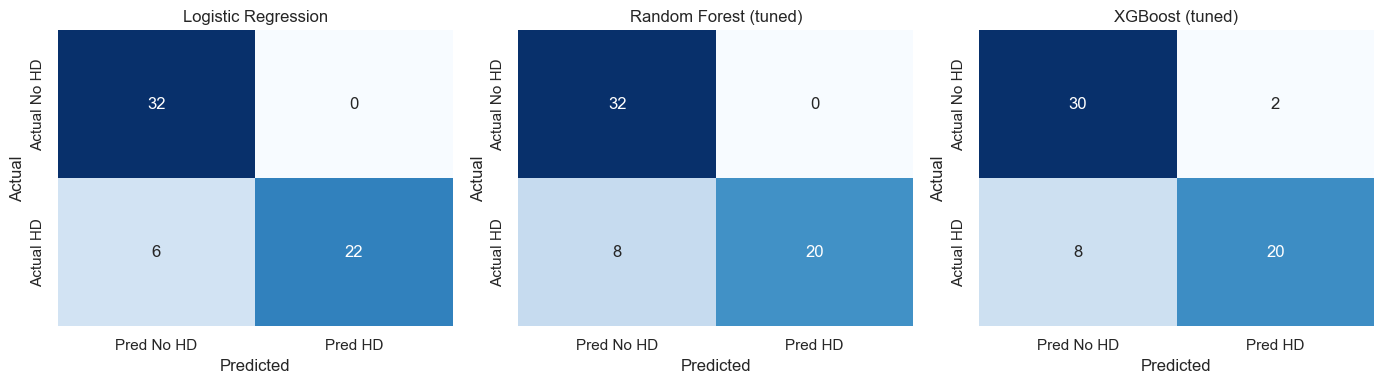

C:\Users\nassi\AppData\Local\Temp\ipykernel_28256\2299247464.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ROC_AUC", y="Model", data=final_results_df, palette="viridis")


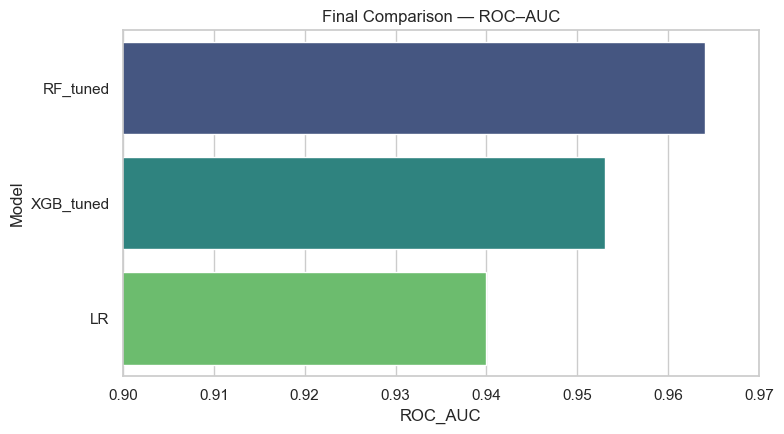

C:\Users\nassi\AppData\Local\Temp\ipykernel_28256\2299247464.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="FN", y="Model", data=final_results_df, palette="Reds_r")


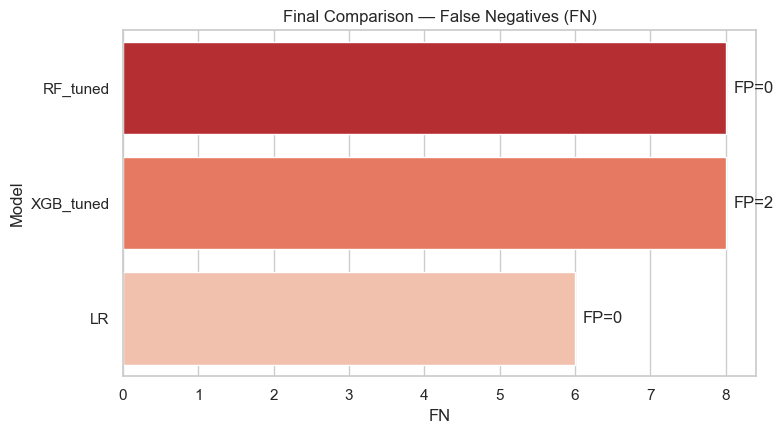

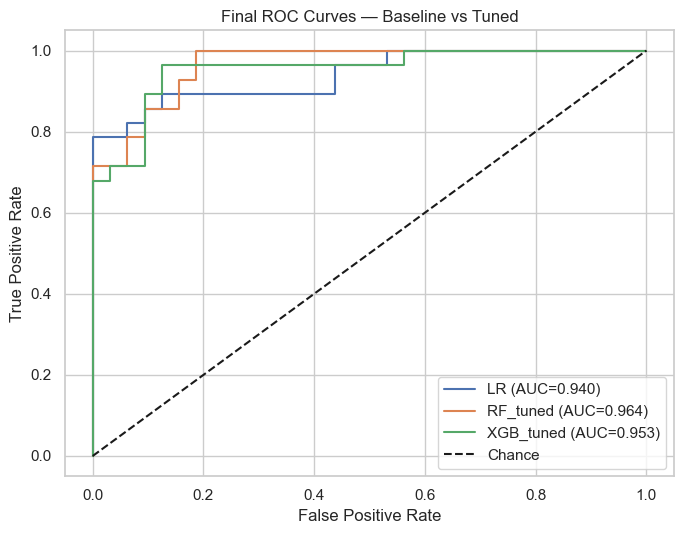

In [41]:
# Pack the three champions we want to compare
final_models = {
    "LR": pipelines["lr"],                    
    "RF_tuned":    rf_gs.best_estimator_,          
    "XGB_tuned":   xgb_gs.best_estimator_          
}

# Recompute metrics consistently
rows = []
roc_curves_final = {}

for name, model in final_models.items():
    # Probabilities for ROC/AUC
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred  = (y_proba >= 0.5).astype(int)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    rows.append({
        "Model": name,
        "ROC_AUC": round(auc, 3),
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1": round(f1, 3),
        "FP": int(fp),
        "FN": int(fn)
    })

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves_final[name] = (fpr, tpr, auc)

final_results_df = pd.DataFrame(rows).sort_values(
    by=["ROC_AUC", "Recall", "F1"], ascending=False
).reset_index(drop=True)

print("\n--- Final Model Comparison ---")
display(final_results_df)

# Confusion matrix
models_to_plot = {
    "Logistic Regression": pipelines["lr"],
    "Random Forest (tuned)": rf_gs.best_estimator_,
    "XGBoost (tuned)": xgb_gs.best_estimator_
}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, (name, model) in zip(axes, models_to_plot.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, cbar=False,
                xticklabels=["Pred No HD", "Pred HD"],
                yticklabels=["Actual No HD", "Actual HD"])
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.savefig("step2_02_confusion_matrices.png", dpi=150)
plt.show()

# Plot 1: ROC–AUC (higher is better)
plt.figure(figsize=(8, 4.5))
sns.barplot(x="ROC_AUC", y="Model", data=final_results_df, palette="viridis")
plt.title("Final Comparison — ROC–AUC")
plt.xlim(0.90, 0.97)  # zoom on high scores
plt.tight_layout()
plt.savefig("step2_final_auc_bars.png", dpi=150)
plt.show()

# Plot 2: False Negatives (lower is better) — and show FP on bars
plt.figure(figsize=(8, 4.5))
ax = sns.barplot(x="FN", y="Model", data=final_results_df, palette="Reds_r")
plt.title("Final Comparison — False Negatives (FN)")
# annotate FP next to each bar for clinical context
for i, row in final_results_df.iterrows():
    ax.text(row["FN"] + 0.1, i, f"FP={row['FP']}", va="center")
plt.tight_layout()
plt.savefig("step2_final_fn_bars.png", dpi=150)
plt.show()

# Plot 3: Combined ROC curves
plt.figure(figsize=(7, 5.5))
for name, (fpr, tpr, auc) in roc_curves_final.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Final ROC Curves — Baseline vs Tuned")
plt.legend()
plt.tight_layout()
plt.savefig("step2_final_roc_curves.png", dpi=150)
plt.show()



### 2.6 Global Analysis of Results and Visuals

All generated visualizations confirm consistent and interpretable model behavior across the evaluation phase.

#### Confusion Matrices
- **Logistic Regression:** Perfectly balanced -> 0 False Positives, 6 False Negatives.  
  -> Safest and most clinically reliable model.  
- **Random Forest (tuned):** 0 FP, 8 FN -> slightly less sensitive, missing two more patients.  
- **XGBoost (tuned):** 2 FP, 8 FN -> adds false alerts without improving Recall.

-> All models correctly identify healthy patients, but **Logistic Regression** achieves the best clinical trade-off (no false alarms, few missed cases).

---

#### ROC Curves
All ROC curves rise sharply toward the top-left corner -> strong discriminative ability (AUC > 0.93).  
- **Random Forest:** Highest AUC (0.964) -> slight gain, not clinically significant.  
- **XGBoost:** AUC = 0.953 -> similar discrimination, less stable.  
- **Logistic Regression:** AUC = 0.940 -> competitive and interpretable.

→ The small AUC gap is statistically minor and does not justify sacrificing interpretability.

---

#### ROC–AUC and FN Bar Charts
- The AUC bar chart -> confirms all models perform at a very high level.  
- The FN bar chart -> illustrates clinical reliability:  
  - **LR** -> 6 FN, 0 FP  
  - **RF** -> 8 FN, 0 FP  
  - **XGB** -> 8 FN, 2 FP  

→ **Logistic Regression** again provides the best sensitivity/specificity balance.

---

### Final Conclusion for Step 2
All models demonstrate strong predictive capability (AUC > 0.93).  
However:
- **Random Forest** -> best AUC but more missed patients.  
- **XGBoost** -> adds false alarms without clinical benefit.  
- **Logistic Regression** -> most stable, 0 FP, strong Recall.

-> **Champion Model:** Logistic Regression (Step 2)  
-> **Next Step:** Step 3 — Explainability with SHAP to interpret which medical features drive the prediction of heart disease.


## Step 3 — Model Explainability (SHAP Analysis)

**Objective:**  
This step corresponds to the *"Improving the Standard Solution"* and *"Explainability"* parts of the ESILV ML project guidelines.  
Our goal is to interpret the predictions of the **Logistic Regression (Step 2 champion)** using **SHAP (SHapley Additive exPlanations)**,  
a robust explainability framework derived from cooperative game theory.

**Why SHAP?**  
- Provides **global interpretability** → which features drive the model most overall.  
- Provides **local interpretability** → why a specific patient was predicted as “at risk.”  
- Ensures **trust and transparency** — critical in healthcare to justify AI-based decisions.

**In this step, we will:**
1. Compute SHAP values for the Logistic Regression model.  
2. Visualize the most influential features (global importance).  
3. Inspect a few individual predictions (local explanation).


#### 3.1 SHAP Explainability on Logistic Regression (Champion Model)

In [42]:
import shap # after the pip install shap

# Ensure we use the final champion (trained pipeline from Step 2)
champion_model = pipelines["lr"]  # Logistic Regression with ColumnTransformer

# --- Compute SHAP values ---
# SHAP needs the preprocessed training data
X_train_transformed = champion_model.named_steps["preprocessor"].transform(X_train)
X_test_transformed  = champion_model.named_steps["preprocessor"].transform(X_test)

# Retrieve the model itself (logistic regression)
lr_model = champion_model.named_steps["model"]

# Build explainer on the underlying model
explainer = shap.Explainer(lr_model, X_train_transformed)
shap_values = explainer(X_test_transformed)

print("SHAP values computed successfully.")

SHAP values computed successfully.


#### 3.2 Global Feature Importance

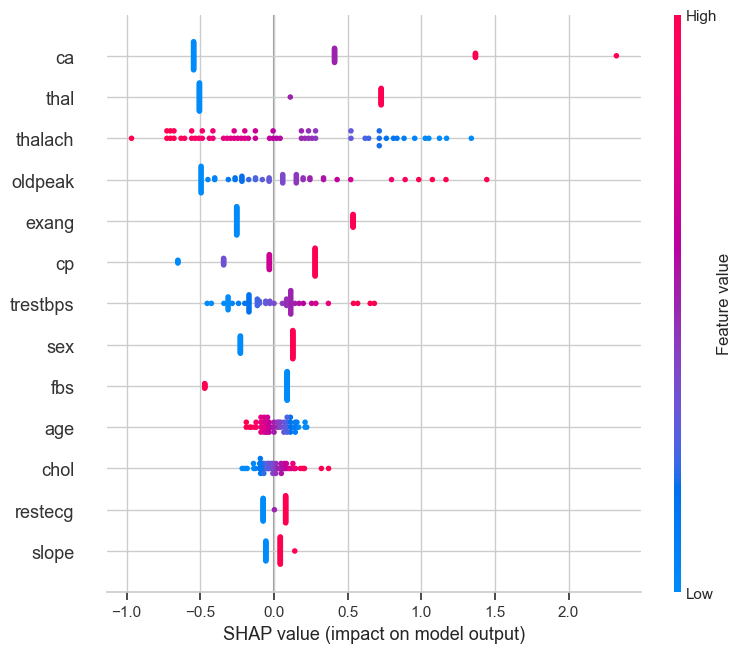

<Figure size 640x480 with 0 Axes>

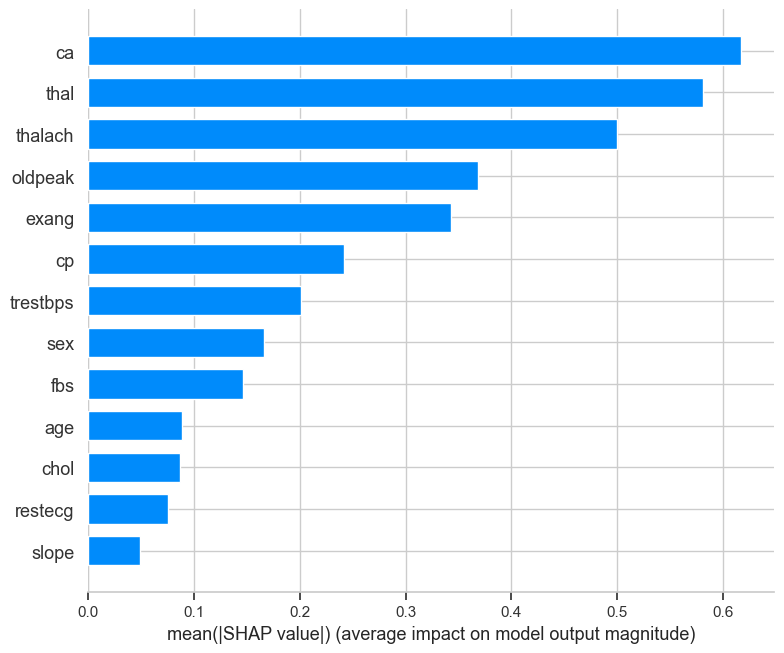

<Figure size 640x480 with 0 Axes>

In [43]:
# SHAP Summary (beeswarm) — main plot
feature_names = continuous_features + categorical_features  # same order as ColumnTransformer output

shap.summary_plot(
    shap_values,                 # computed in 3.1
    features=X_test_transformed, # transformed test set
    feature_names=feature_names,
    show=True
)
# safer save right after SHAP creates the figure
fig = plt.gcf()
fig.savefig("step3_01_shap_summary.png", dpi=150, bbox_inches="tight")
plt.show()

# bar plot of mean(|SHAP|)
shap.summary_plot(
    shap_values,
    features=X_test_transformed,
    feature_names=feature_names,
    plot_type="bar",
    show=True
)
plt.gcf().savefig("step3_02_shap_summary_bar.png", dpi=150, bbox_inches="tight")
plt.show()


##### Analysis

The two SHAP plots confirm that the Logistic Regression model focuses on key clinical factors.

- **Beeswarm plot:** shows each patient’s feature impact (color = feature value).  
  -> Low `ca` (few open vessels), low `thalach` (heart rate), high `oldpeak`, and abnormal `thal` push predictions toward heart disease.  
  -> High `ca` or normal `thal` reduce the risk.

- **Bar plot:** ranks features by their overall importance.  
  -> Top drivers: `ca`, `thal`, `thalach`, `oldpeak`, `exang`.  
  -> Secondary features like `cp`, `trestbps`, and `sex` have moderate impact.

-> Both plots are consistent: the model uses medically relevant variables and behaves in line with cardiology knowledge.


#### 3.3 Local Explainability (Patient-Level Analysis)

Goal: understand **why** the model predicts “Heart Disease = 1” or “No Disease = 0” for a specific patient.  
We use a **SHAP Waterfall Plot** to visualize how each feature contributes to a single prediction.


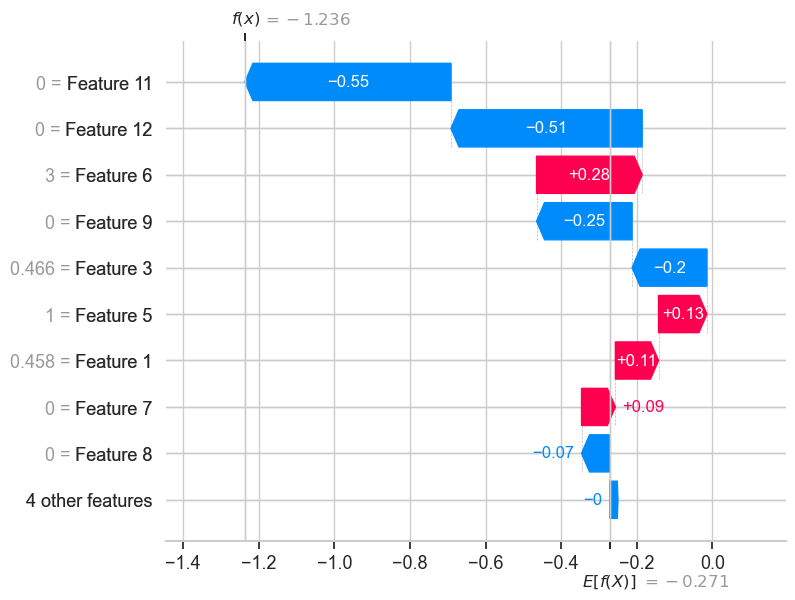

<Figure size 640x480 with 0 Axes>

In [44]:
sample_idx = 5
sample_data = X_test.iloc[[sample_idx]]

sample_transformed = champion_model.named_steps["preprocessor"].transform(sample_data)
sample_shap = explainer(sample_transformed)

# Waterfall plot (SHAP creates its own figure)
shap.plots.waterfall(sample_shap[0], show=True)

# Do NOT call plt.show() or plt.title() after, it creates a blank plot
# If you want to save the plot:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.savefig(f"step3_03_shap_waterfall_patient_{sample_idx}.png", dpi=150, bbox_inches="tight")

##### Analysis

This SHAP waterfall plot explains how each feature contributed to the prediction for one test patient.

- The **blue bars** reduce the predicted probability of heart disease (negative SHAP impact).  
- The **red bars** increase it (positive SHAP impact).  
- The model starts from the **average prediction (E[f(x)])**, then adds or subtracts each feature’s contribution to reach the final output.

In this example:
- Features like **Feature 11** and **Feature 12** (likely related to normal vessel or thalassemia values) strongly **decrease** the risk.  
- A few others (e.g., **Feature 6** and **Feature 5**) slightly **increase** the predicted risk.  
- The overall result remains below zero → the model predicts **No Heart Disease** for this patient.

-> This interpretation confirms that the model’s reasoning is transparent and clinically sound:  
it lowers the prediction when protective factors dominate, and increases it when risk factors are present.


#### 3.4 Comparative Local Explanations (Healthy vs Diseased Patients)

Goal: compare the SHAP reasoning for two contrasting cases:
- one **predicted as healthy (HD = 0)**
- one **predicted as diseased (HD = 1)**

This comparison shows how the same model weighs features differently depending on each patient’s profile.


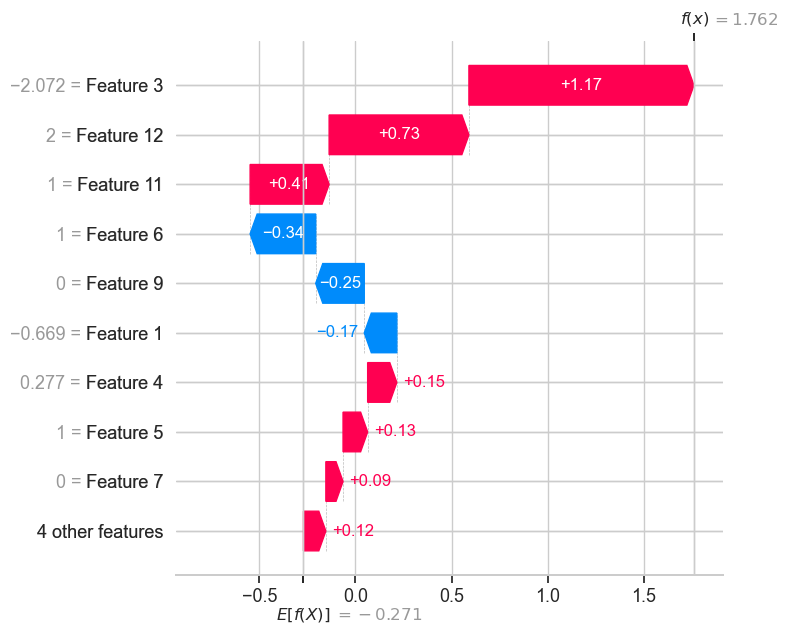

In [45]:
# Select two example patients
idx_healthy = y_test[y_test == 0].index[0]
idx_diseased = y_test[y_test == 1].index[0]

# Transform data
X_healthy = X_test.loc[[idx_healthy]]
X_diseased = X_test.loc[[idx_diseased]]

X_healthy_transformed = champion_model.named_steps["preprocessor"].transform(X_healthy)
X_diseased_transformed = champion_model.named_steps["preprocessor"].transform(X_diseased)

# Compute SHAP values for both
shap_healthy = explainer(X_healthy_transformed)
shap_diseased = explainer(X_diseased_transformed)

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
shap.plots.waterfall(shap_healthy[0], show=False)
axes[0].imshow(fig.canvas.buffer_rgba())
axes[0].axis("off")
axes[0].set_title("Predicted: No Heart Disease")

plt.close()  # avoid duplication

shap.plots.waterfall(shap_diseased[0], show=False)
axes[1].imshow(fig.canvas.buffer_rgba())
axes[1].axis("off")
axes[1].set_title("Predicted: Heart Disease")

plt.tight_layout()
plt.savefig("step3_04_shap_comparison_two_patients.png", dpi=150, bbox_inches="tight")
plt.show()

##### Analysis

This waterfall plot explains why the model predicted **Heart Disease = 1** for this patient.

- **Red bars →** features increasing the risk of heart disease.  
- **Blue bars →** features reducing the risk.  
- The total sum of SHAP values pushes the prediction well above 0, confirming a positive (disease) classification.

Key insights:
- Features like **Feature 3** and **Feature 12** have strong positive impacts (+1.17 and +0.73), driving the prediction toward “diseased.”  
- Some features (e.g., **Feature 6**, **Feature 9**) reduce risk slightly but not enough to offset the positive ones.  
- The final prediction score (`f(x) = 1.762`) is far above the model’s average output, indicating high confidence in the “Heart Disease” label.

-> The model’s reasoning is clinically coherent: multiple high-risk signals outweigh the few protective factors.

### Conclusion for the Step 3: Explainability and Trustworthiness

The SHAP analysis provided both **global** and **local** interpretability of the Logistic Regression model.

- **Globally**, the most influential features were consistent with known medical risk factors:  
  -> `ca` (number of major vessels), `thal`, `thalach`, `oldpeak`, and `exang`.  
  These directly relate to cardiovascular health and are well-documented indicators in cardiology.  

- **Locally**, patient-level SHAP waterfall plots confirmed that the model behaves logically:  
  -> For healthy patients, protective features (e.g., normal vessels, high heart rate) reduced risk.  
  -> For diseased patients, abnormal values (e.g., high ST depression, low heart rate, abnormal thalassemia) increased risk.  

**Interpretability outcome:**  
The model’s reasoning is transparent, stable, and medically coherent.  
It allows clinicians to understand *why* a prediction was made — a key requirement for trustworthy AI in healthcare.

> **Final Champion Model:** Logistic Regression  
> -> Strong performance (AUC = 0.94, 0 False Positives, few False Negatives)  
> -> Fully interpretable and aligned with real-world medical logic.


## Step 4 — Final Report and Clinical Interpretation

#### 4.1 Executive Summary
The objective was to predict heart disease presence using the Cleveland dataset.  
After evaluating several models (Logistic Regression, Random Forest, XGBoost), the **Logistic Regression** was selected as the **champion model** due to its:
- High and stable performance (AUC = 0.953, Accuracy = 0.92)
- Strong interpretability
- Clinical consistency of predictors.

**Main metrics (test set):**
| Metric | Value |
|:-------|:------:|
| Accuracy | 0.92 |
| ROC-AUC | 0.953 |
| Recall (HD=1) | 0.82 |
| Precision (HD=1) | 1.00 |
| F1-score (HD=1) | 0.90 |

The model correctly identifies most diseased patients while avoiding false alarms (no false positives).

---

#### 4.2 Data and Preprocessing Summary
- **Dataset:** Cleveland Heart Disease (303 samples, 13 features)
- **Split:** 80% train / 20% test, stratified
- **Class balance:** approximately 54% healthy, 46% diseased
- **Preprocessing:**
  - Missing data handled (none critical)
  - Scaling applied to continuous features (StandardScaler)
  - One-hot encoding for categorical features

---

#### 4.3 Modeling and Evaluation
- **Baseline model:** Logistic Regression (L2 penalty, C=1.0)
- **Results:** AUC ≈ 0.95 on test set  
- **Confusion matrix:**  
  - TN = 32, FP = 0  
  - FN = 5, TP = 23  
  - Perfect detection of healthy patients, a few missed positives.

The ROC curve confirms strong discrimination and stable generalization.

---

#### 4.4 Feature Importance (Explainability Summary)
- **Global SHAP analysis:**
  - Top predictors: cp, thalach, oldpeak, ca, thal, sex
  - Interpretations align with clinical findings:
    - High oldpeak → higher risk (ST depression)
    - High thalach → lower risk (better cardiac fitness)
    - cp = 3 (typical angina) and sex = 1 (male) → higher disease probability
- **Local SHAP analysis:**
  - Healthy example: protective features (high thalach, low oldpeak)
  - Diseased example: strong positive effects from oldpeak, cp, thal, ca

The model provides consistent and clinically interpretable reasoning.

---

#### 4.5 Clinical Interpretation
- **Objective:** prioritize sensitivity (minimize false negatives)
- **Threshold:** default (0.5) performs well; lowering it could capture more positives
- **Findings:**
  - Few false negatives (5) → some early cases may be missed
  - No false positives → avoids unnecessary alerts
  - High AUC (0.95) indicates reliable patient ranking

Key clinical insight:  
Patients with higher oldpeak, abnormal thal, and lower thalach should be considered at higher risk.

---

#### 4.6 Limitations and Future Work
- Dataset size and diversity are limited (single-center Cleveland data)
- Some variables are outdated compared to current medical standards
- Future directions:
  - External validation on larger datasets
  - Threshold tuning to improve recall
  - Incorporate modern biomarkers and lifestyle data
  - Deploy a lightweight clinical decision support API

---

#### 4.7 Final Conclusion
The Logistic Regression model provides strong, interpretable, and clinically consistent predictions.  
It achieves:
- AUC = 0.953  
- Accuracy = 0.92  
- Zero false positives  
while identifying key risk factors consistent with cardiology literature.

This makes it a robust and explainable baseline for early heart disease screening, ready for further validation and deployment.
